In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os

sz = 128
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=26, activation='softmax')) 


classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 


classifier.summary()



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test4',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 11852 images belonging to 26 classes.
Found 4810 images belonging to 26 classes.


In [4]:
r=classifier.fit_generator(
        training_set,    
        epochs=30,
        validation_data=test_set,
    steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
        )

Epoch 1/30
1186/1186 [==============================] - 179s 151ms/step - loss: 3.2617 - accuracy: 0.0371 - val_loss: 3.2641 - val_accuracy: 0.0385
Epoch 2/30
1186/1186 [==============================] - 175s 147ms/step - loss: 3.2609 - accuracy: 0.0392 - val_loss: 3.2416 - val_accuracy: 0.0399
Epoch 3/30
1186/1186 [==============================] - 174s 146ms/step - loss: 2.4867 - accuracy: 0.2368 - val_loss: 0.6997 - val_accuracy: 0.7815
Epoch 4/30
1186/1186 [==============================] - 176s 148ms/step - loss: 0.9883 - accuracy: 0.6650 - val_loss: 0.9446 - val_accuracy: 0.9198
Epoch 5/30
1186/1186 [==============================] - 163s 137ms/step - loss: 0.6424 - accuracy: 0.7821 - val_loss: 2.3622 - val_accuracy: 0.9081
Epoch 6/30
1186/1186 [==============================] - 145s 122ms/step - loss: 0.4737 - accuracy: 0.8410 - val_loss: 0.0034 - val_accuracy: 0.9653
Epoch 7/30
1186/1186 [==============================] - 170s 143ms/step - loss: 0.3728 - accuracy: 0.8737 - val_

In [5]:
classifier.save('CNNarch.h5')

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

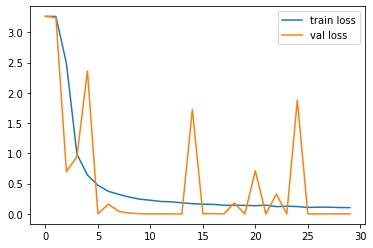

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

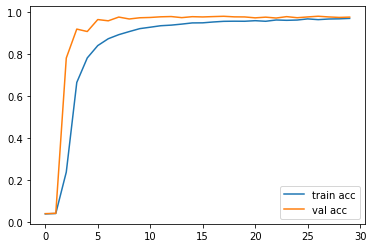

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')